# Bank Customer Churn Prediction

This dataset is for ABC Multistate bank with following columns:

1. customer_id, unused variable.
2. credit_score, used as input.
3. country, used as input.
4. gender, used as input.
5. age, used as input.
6. tenure, used as input.
7. balance, used as input.
8. products_number, used as input.
9. credit_card, used as input.
10. active_member, used as input.
11. estimated_salary, used as input.
12. churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

> About this file
Every bank wants to hold there customers for sustaining their business so the ABC Multinational bank.
Below is the customer data of account holders at ABC Multinational Bank and the aim of the data will be predicting the Customer Churn.

# I. Importation

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,  GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [87]:
# read dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [88]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


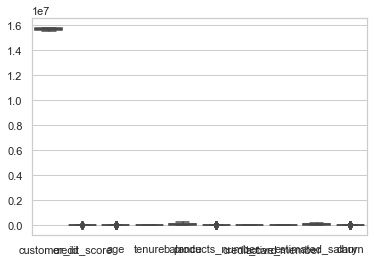

In [90]:
sns.set(style = 'whitegrid')
sns.boxplot(data = df)
plt.show()

In [91]:
# check null variables
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

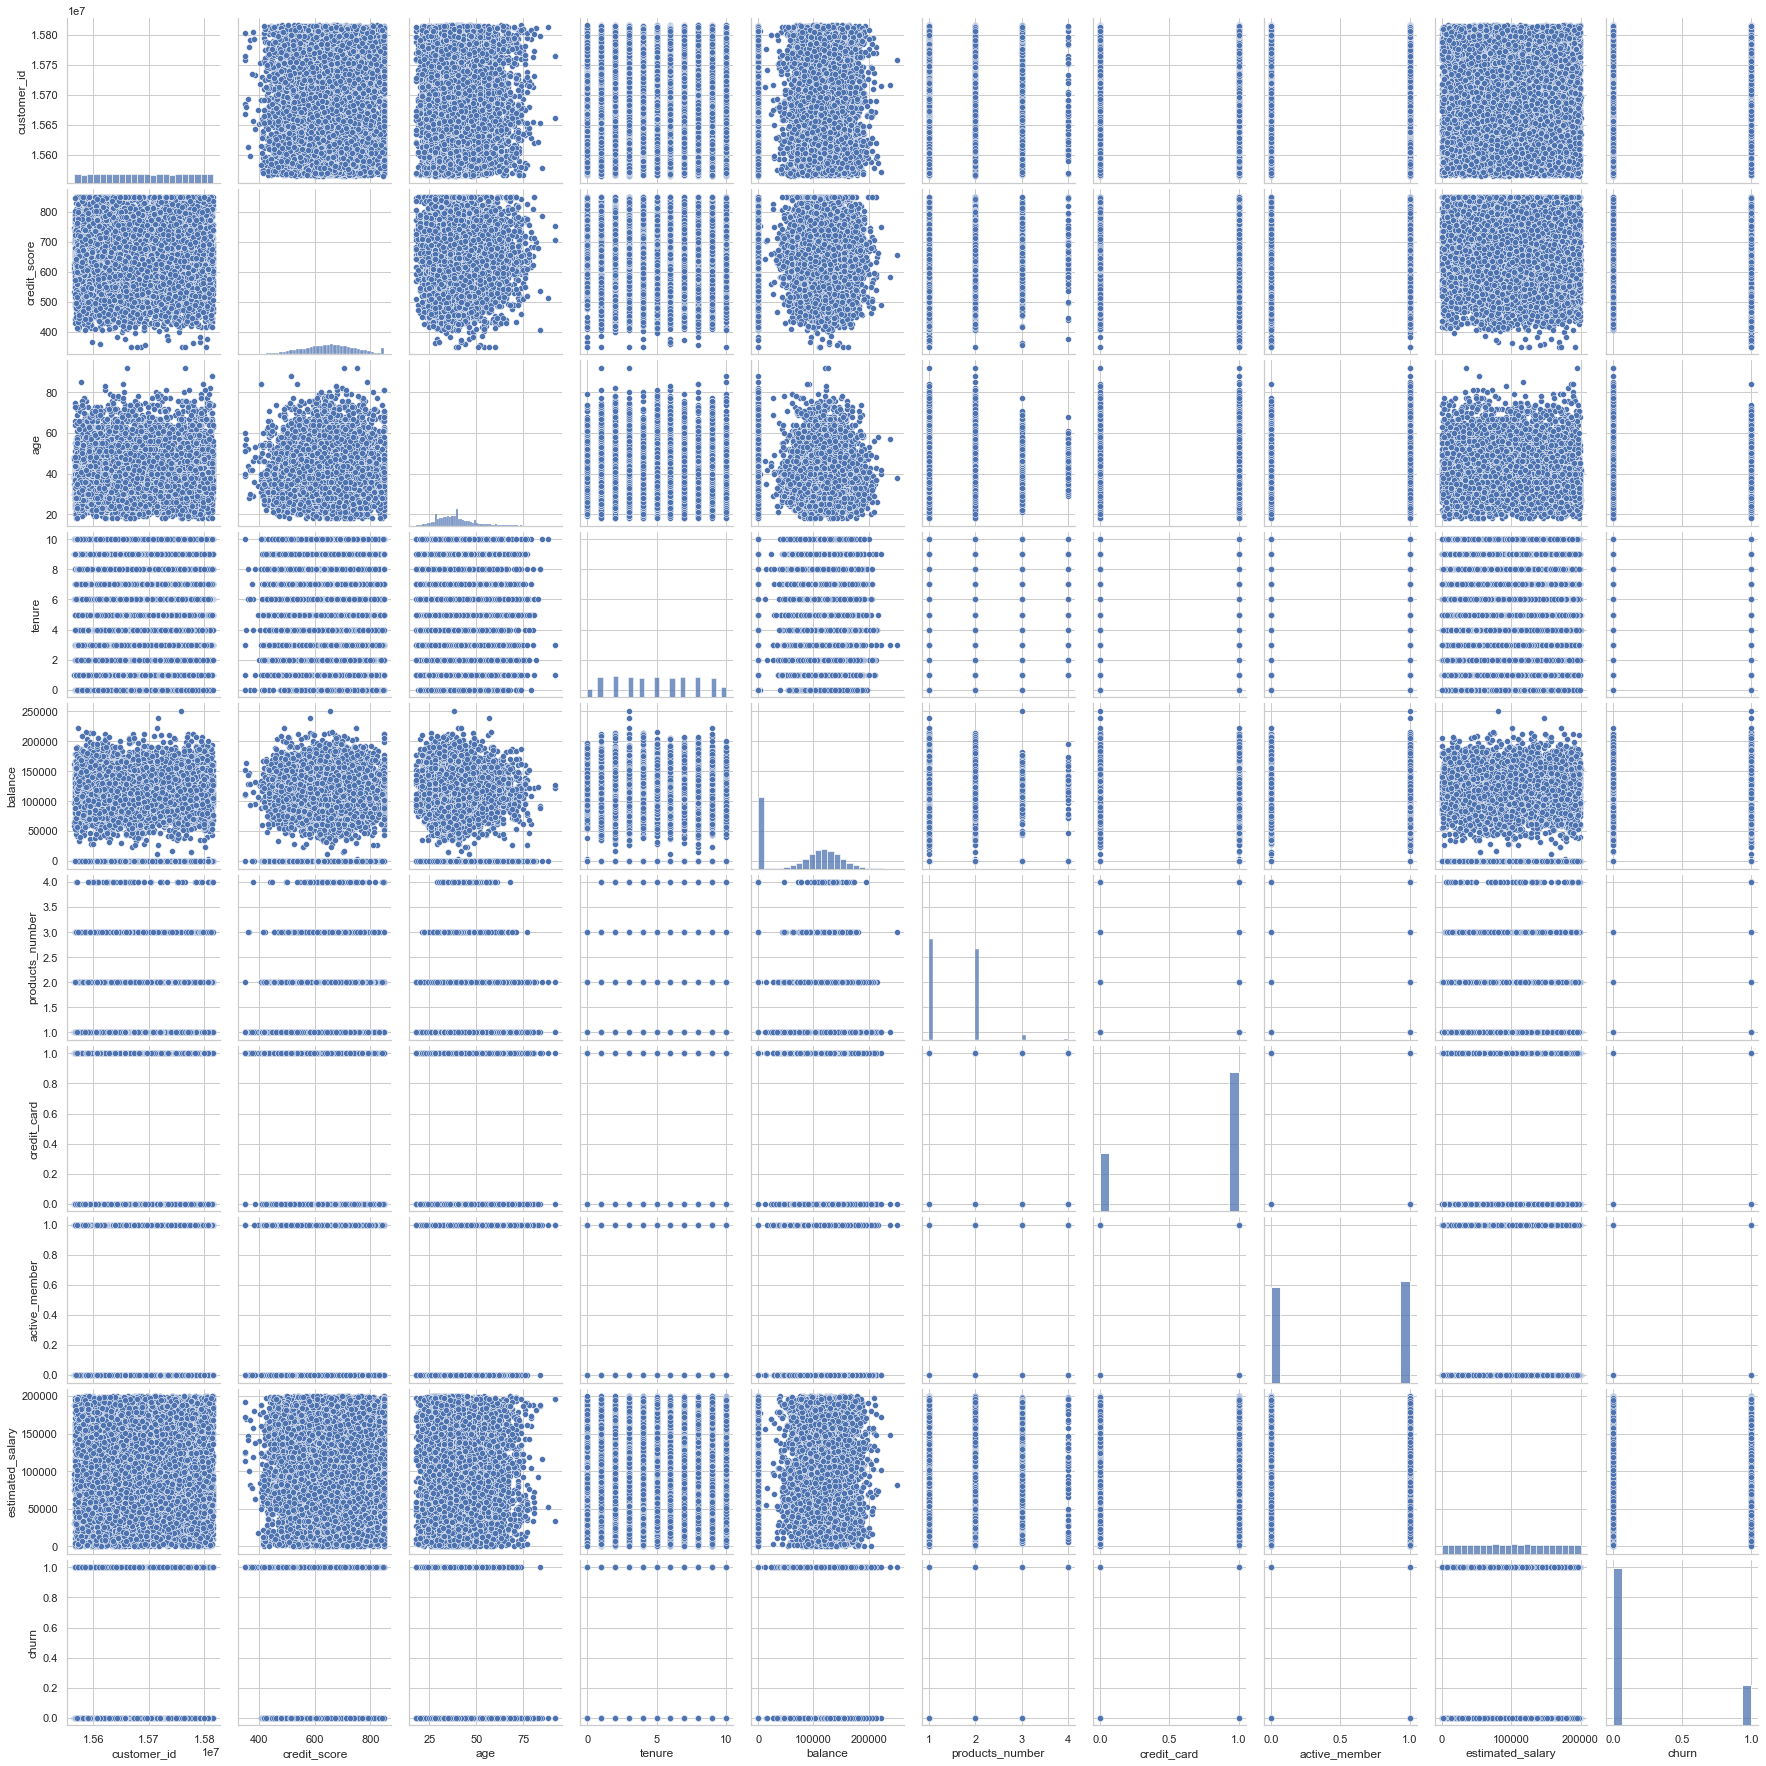

In [92]:
# pairplot
sns.pairplot(df)
plt.show()

In [93]:
# correlations
correlations = df.corr(method ='pearson')
correlations

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


## II. Splitting and preporeccessing Data

In [94]:
X = df.iloc[:,1:11]
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [95]:
Y = df.iloc[:,11]
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [96]:
#Change value in country column
X['country'] = X['country'].replace(['Germany'],'0')
X['country'] = X['country'].replace(['France'],'1')
X['country'] = X['country'].replace(['Spain'],'2')
#Change value in gender column
X['gender'] = X['gender'].replace(['Female'],'0')
X['gender'] = X['gender'].replace(['Male'],'1')
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,1,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,1,0,42,8,159660.80,3,1,0,113931.57
3,699,1,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64
9996,516,1,1,35,10,57369.61,1,1,1,101699.77
9997,709,1,0,36,7,0.00,1,0,1,42085.58
9998,772,0,1,42,3,75075.31,2,1,0,92888.52


In [97]:
# 20% test et 80% train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## III. Choose the right model

In [98]:
# Put models in a dictionnary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "DecisionTreeClassifier":DecisionTreeClassifier(random_state=0)}

In [99]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    Y_train : training labels
    Y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    #Make a dictionary to keep models scores
    model_scores = {}
    # loop through Models
    for name, model in models.items():
        
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

{'Logistic Regression': 0.789, 'KNN': 0.7645, 'Random Forest': 0.869, 'DecisionTreeClassifier': 0.8015}


<AxesSubplot:>

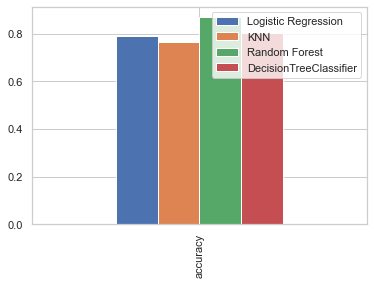

In [100]:
print(fit_and_score(models, x_train, x_test, y_train, y_test))
model_compare = pd.DataFrame(fit_and_score(models, x_train, x_test, y_train, y_test), index=["accuracy"])
model_compare.plot.bar()

## VI.Feature Scaling

In [101]:
scaller = StandardScaler()

In [102]:
x_train_sc = scaller.fit_transform(x_train)
x_test_sc = scaller.transform(x_test)
x_train_sc[0:10,:]

array([[ 0.16958176,  1.42102704, -1.09168714, -0.46460796,  0.00666099,
        -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,  1.10643166],
       [-2.30455945, -1.42814998,  0.91601335,  0.30102557, -1.37744033,
        -0.00631193, -0.92159124,  0.64259497,  0.9687384 , -0.74866447],
       [-1.19119591, -0.00356147, -1.09168714, -0.94312892, -1.031415  ,
         0.57993469, -0.92159124,  0.64259497, -1.03227043,  1.48533467],
       [ 0.03556578,  1.42102704,  0.91601335,  0.10961719,  0.00666099,
         0.47312769, -0.92159124,  0.64259497, -1.03227043,  1.27652776],
       [ 2.05611444,  1.42102704, -1.09168714,  1.73658844,  1.04473698,
         0.8101927 ,  0.8095029 ,  0.64259497,  0.9687384 ,  0.55837842],
       [ 1.29325423, -1.42814998, -1.09168714, -0.17749539, -1.031415  ,
         0.44253504,  0.8095029 ,  0.64259497, -1.03227043,  1.63252134],
       [ 1.6128308 , -0.00356147,  0.91601335,  0.77954653, -1.37744033,
         0.30432823, -0.92159124, -1.55619021

{'Logistic Regression': 0.8145, 'KNN': 0.8315, 'Random Forest': 0.8695, 'DecisionTreeClassifier': 0.803}


<AxesSubplot:>

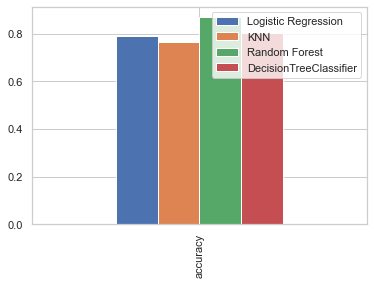

In [103]:
print(fit_and_score(models, x_train_sc, x_test_sc, y_train, y_test))
model_compare = pd.DataFrame(fit_and_score(models, x_train, x_test, y_train, y_test), index=["accuracy"])
model_compare.plot.bar()

=> So we choose Random Forset

##  VI. Feature selection with Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000)
clf.fit(x_train_sc, y_train)

RandomForestClassifier(n_estimators=1000)

In [105]:
importances = clf.feature_importances_
print(importances)

[0.14220369 0.0420821  0.01905252 0.23692868 0.07919767 0.14644956
 0.13049224 0.01885233 0.03811425 0.14662695]


In [106]:
name_col = X.columns
name_col

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

In [107]:
sorted_idx = np.argsort(importances[::-1])
sorted_idx

array([2, 7, 1, 8, 5, 3, 9, 4, 0, 6], dtype=int64)

In [117]:
features = ['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary']

In [118]:
features_arr = np.asarray(features)

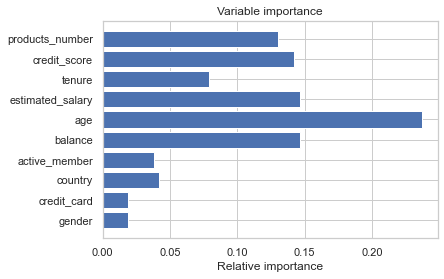

In [119]:
padding = np.arange(x_train.size/len(x_train))+0.5
plt.barh(padding, importances[sorted_idx],align='center')
plt.yticks(padding,features_arr[sorted_idx])
plt.xlabel("Relative importance")
plt.title("Variable importance")
plt.show()

## V. Model training

In [111]:
model = RandomForestClassifier()
# Training the RandomForestClassifier model with Training data
model.fit(x_train_sc, y_train)

RandomForestClassifier()

## VII. Model Evaluation

In [112]:
# accuracy on training data
X_train_prediction = model.predict(x_train_sc)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [113]:
print(f'Accuracy on Training data : {training_data_accuracy}')

Accuracy on Training data : 0.99975


In [114]:
# accuracy on test data
X_test_prediction = model.predict(x_test_sc)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [115]:
print(f'Accuracy on Test data : {test_data_accuracy}')

Accuracy on Test data : 0.866


In [116]:
# Make predictions with tuned model
y_preds = model.predict(x_test_sc)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Build prediction API with flask

In [130]:
countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe', 'Tunis']

In [120]:
input_data = (619,1,1,42,2,0,1,1,1,101348.88)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicitng for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

if (prediction[0] == 0):
    print('The Person is not leaving')
elif prediction[0] == 1:
    print('Resking of leaving')
else:
    print('This Person start to have Alzheimer')

The Person is not leaving


In [121]:
from flask import Flask,request,jsonify
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:

# read our pickle file and label our logisticmodel as model
infile = open('model.pkl', 'rb')
model = pickle.load(infile, encoding='bytes')

print(model)

app = Flask(__name__)

@app.route('/')
def index():
    return "Hello world"

@app.route('/predict',methods=['POST'])
def predict():
    print(request.form)
    #['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
    #   'products_number', 'credit_card', 'active_member', 'estimated_salary']
    credit_score = int(request.form.get('credit_score'))
    country = countries.index(request.form.get('country'))
    gender = int(request.form.get('gender'))
    age = int(request.form.get('age'))
    tenure = int(request.form.get('tenure'))
    balance = float(request.form.get('balance'))
    products_number = int(request.form.get('products_number'))
    credit_card = int(request.form.get('credit_card'))
    active_member = int(request.form.get('active_member'))
    estimated_salary = float(request.form.get('estimated_salary'))
    print(credit_score)
    input_query = tuple((credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary))
    # change the input data to numpy array
    input_data_as_numpy_array = np.asarray(input_query)

    # reshape the numpy array as we are predicitng for only on instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    prediction = model.predict(input_data_reshaped)
    result = ""
    if prediction[0] == 1:
        result = "This client is on the verge of leaving."
    else:
        result = "This customer is unlikely to leave."
    return jsonify({'Result':result})
if __name__ == '__main__':
    app.run()

RandomForestClassifier()
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2022-12-14 19:20:03,485] ERROR in app: Exception on /predict [POST]
Traceback (most recent call last):
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\MSI\AppData\Local

ImmutableMultiDict([('credit_score', '1'), ('country', 'Tunis'), ('gender', '1'), ('age', '22'), ('tenure', '1'), ('balance', '123.00'), ('products_number', '2'), ('active_member', '1'), ('estimated_salary', '123.00')])


[2022-12-14 19:33:57,758] ERROR in app: Exception on /predict [POST]
Traceback (most recent call last):
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\MSI\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\MSI\AppData\Local\Temp\ipykernel_4108\548580979.py", line 25, in predict
    

ImmutableMultiDict([('credit_score', '1'), ('country', 'Tunis'), ('gender', '1'), ('age', '22'), ('tenure', '1'), ('balance', '123.00'), ('products_number', '2'), ('active_member', '1'), ('estimated_salary', '123.00')])


127.0.0.1 - - [14/Dec/2022 19:34:49] "POST /predict HTTP/1.1" 200 -


ImmutableMultiDict([('credit_score', '2'), ('country', 'Tunis'), ('gender', '1'), ('age', '22'), ('tenure', '1'), ('balance', '123.00'), ('products_number', '2'), ('credit_card', '1'), ('active_member', '1'), ('estimated_salary', '123.00')])
2


127.0.0.1 - - [14/Dec/2022 19:38:04] "POST /predict HTTP/1.1" 200 -


ImmutableMultiDict([('credit_score', '2'), ('country', 'Tunis'), ('gender', '1'), ('age', '22'), ('tenure', '1'), ('balance', '123.00'), ('products_number', '2'), ('credit_card', '1'), ('active_member', '1'), ('estimated_salary', '123.00')])
2


127.0.0.1 - - [14/Dec/2022 19:40:43] "POST /predict HTTP/1.1" 200 -


ImmutableMultiDict([('credit_score', '2'), ('country', 'Tunis'), ('gender', '1'), ('age', '22'), ('tenure', '1'), ('balance', '123.00'), ('products_number', '2'), ('credit_card', '1'), ('active_member', '1'), ('estimated_salary', '123.00')])
2
